In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [32]:
# Load Training data
crops_df = pd.read_csv('Crop_recommendation.csv')
crops_df

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [29]:
# K Neighbour Clustering

# Using the features, define what type of crop it is
FEATURES = ['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity','ph','rainfall']
x = crops_df[FEATURES].copy()
y = crops_df['label']

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [22]:
# Load test data
test_data = pd.read_csv('Test_data.csv')
test_data

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,19,55,20,27.433294,87.805077,7.185301,54.733676,mungbean
2,41,74,18,28.757518,61.027015,6.599147,73.376868,blackgram
3,39,65,23,25.434598,69.126134,7.685959,41.026829,lentil
4,40,49,47,42.933686,91.175675,6.501521,246.361327,papaya


In [24]:
# The prediction column shows the prediction of the K Neighbor algo
test_data['prediction'] = knn.predict(test_data[FEATURES])

test_data

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,prediction
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice
1,19,55,20,27.433294,87.805077,7.185301,54.733676,mungbean,mungbean
2,41,74,18,28.757518,61.027015,6.599147,73.376868,blackgram,blackgram
3,39,65,23,25.434598,69.126134,7.685959,41.026829,lentil,lentil
4,40,49,47,42.933686,91.175675,6.501521,246.361327,papaya,papaya


In [35]:
# Descision Trees
FEATURES = ['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity','ph','rainfall']
x = crops_df[FEATURES].copy()
y = crops_df['label']

dct = DecisionTreeClassifier()
dct.fit(x,y)

# Load test data
test_data = pd.read_csv('Test_data.csv')
test_data

test_data['prediction'] = dct.predict(test_data[FEATURES])

test_data

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,prediction
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice
1,19,55,20,27.433294,87.805077,7.185301,54.733676,mungbean,mungbean
2,41,74,18,28.757518,61.027015,6.599147,73.376868,blackgram,blackgram
3,39,65,23,25.434598,69.126134,7.685959,41.026829,lentil,lentil
4,40,49,47,42.933686,91.175675,6.501521,246.361327,papaya,papaya


[Text(151.9, 211.7178947368421, 'X[4] <= 27.685\ngini = 0.955\nsamples = 2200\nvalue = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100\n100, 100, 100, 100, 100, 100, 100, 100, 100, 100\n100, 100]'),
 Text(120.9, 200.2736842105263, 'X[2] <= 50.0\ngini = 0.5\nsamples = 200\nvalue = [0, 0, 0, 100, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(108.5, 188.82947368421054, 'gini = 0.0\nsamples = 100\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(133.3, 188.82947368421054, 'gini = 0.0\nsamples = 100\nvalue = [0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(182.9, 200.2736842105263, 'X[1] <= 107.5\ngini = 0.95\nsamples = 2000\nvalue = [100, 100, 100, 0, 100, 100, 100, 100, 100, 0, 100\n100, 100, 100, 100, 100, 100, 100, 100, 100, 100\n100]'),
 Text(158.1, 188.82947368421054, 'X[6] <= 30.393\ngini = 0.944\nsamples = 1800\nvalue = [0, 100, 100, 0, 100, 100, 100, 0, 100, 0, 100\n100, 100, 100, 100, 100, 100, 

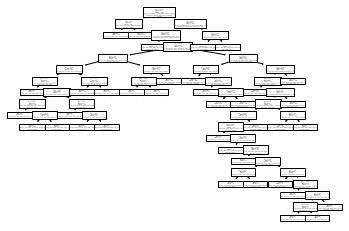

In [40]:
plt.figure(figsize=(30, 30))
plot_tree(dct)
plt.show()